<a href="https://colab.research.google.com/github/dhar9571/Python---Diwali-Sales-Data-Analysis/blob/main/Diwali_Sales_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Mounting Google Drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Loading the dataset:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Diwali_Sales_Dataset/Diwali Sales Data.csv",encoding='unicode_escape')

# To avoid error, used "unicode_escape" encoding

In [9]:
# Dataframe first view:

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
# Dataframe shape

df.shape

(11251, 15)

In [13]:
# Checking null values in dataframe:

df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [14]:
# Dropping null columns:

df.drop(columns = ["Status","unnamed1"],axis = 1, inplace = True)

In [17]:
# Deleting null rows from the dataframe:

df.dropna(inplace=True)

In [18]:
# Again checking null values in dataframe:

df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [21]:
# Converting the data type of Amount columns as it has anomlies in decimal numbers:

df["Amount"] = df["Amount"].astype(int)

In [22]:
# Dataframe information:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [23]:
# Viewing of the data description for age, orders and amount columns:

df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

Text(0.5, 1.0, 'Gender Count')

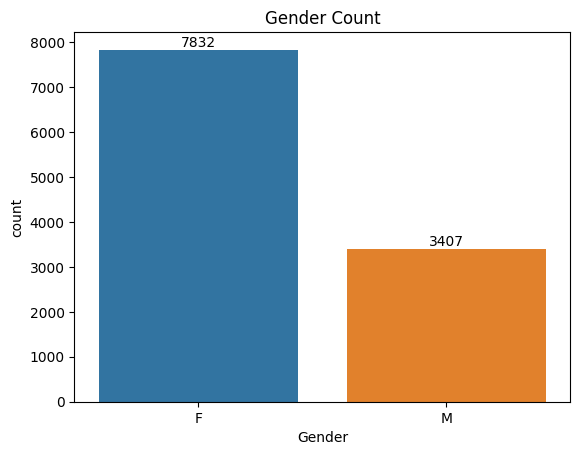

In [29]:
# Countplot for Gender counts:

ax = sns.countplot(x=df["Gender"])

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Gender Count")

Observation: Female has more than double the count of Males.

Text(0.5, 1.0, 'Gender wise Total Amount')

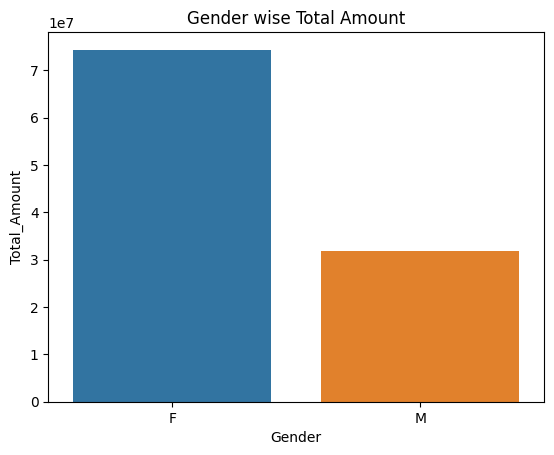

In [42]:
# Plotting gender wise total amount in bar chart:

# Creating a seperate dataframe which shows gender wise sum of amount:
gender_amount = df.groupby("Gender")["Amount"].sum().reset_index().rename(columns = {"Amount":"Total_Amount"})

sns.barplot(x=gender_amount["Gender"],y=gender_amount["Total_Amount"])

plt.title("Gender wise Total Amount")

Observation: Females has almost more than double the purchasing power than Males.

Text(0.5, 1.0, 'Gender wise Age Group counts')

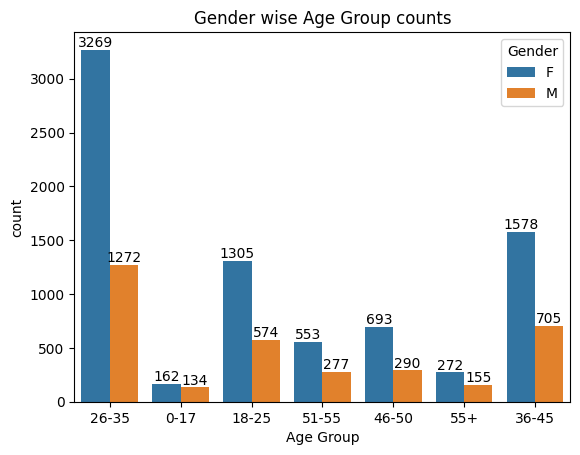

In [43]:
# Plotting age group counts:

ax = sns.countplot(x=df["Age Group"],hue=df["Gender"])

for bars in ax.containers:
  ax.bar_label(bars)

plt.title("Gender wise Age Group counts")

Observation: From above graph, we can clearly see that age group 26-35 has the most counts in which Females has more than double the count of Males.

Text(0.5, 1.0, 'Age Group wise Total Amount')

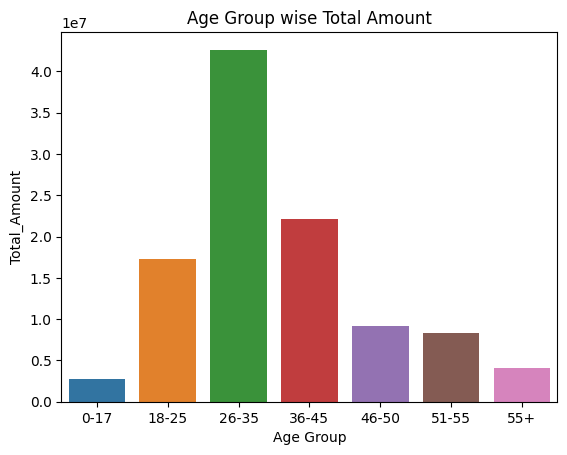

In [44]:
# Plotting Age group wise Total Amount:

# Creating new dataframe which contains group wise sum amount:

age_amount = df.groupby("Age Group")["Amount"].sum().reset_index().rename(columns={"Amount":"Total_Amount"})

ax = sns.barplot(x=age_amount["Age Group"],y=age_amount["Total_Amount"])

plt.title("Age Group wise Total Amount")

Observation: As per above chart, age group 26-35 has the most buyers.

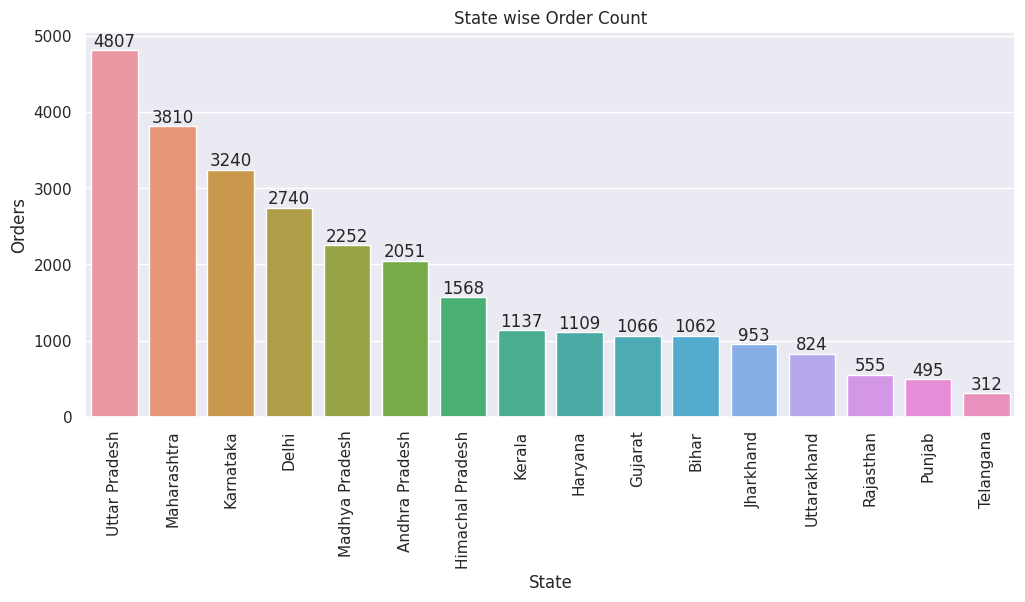

In [69]:
# Plotting state wise order counts:

state_orders = df.groupby("State")["Orders"].sum().sort_values(ascending=False).reset_index()

# resetting plot size:
sns.set(rc={'figure.figsize':(12,5)})

ax = sns.barplot(x = state_orders["State"], y = state_orders["Orders"])

for bars in ax.containers:
  ax.bar_label(bars) 

plt.title("State wise Order Count")
plt.xticks(rotation=90)
plt.show()

Observation: From above sorted chart, we can see that Uttar Pradesh state has the most number of orders. Maharashtra and Karnataka are at 2nd and 3rd place.

In [45]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
